In [10]:
import matplotlib.pyplot as plt
import numpy as np

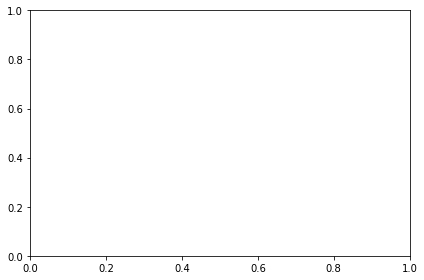

In [11]:
f, ax = plt.subplots()

# Create Figure and Axes

figsize parameters list?

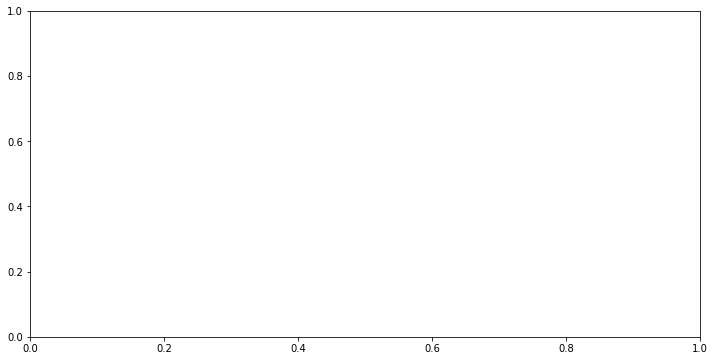

In [2]:
f, ax = plt.subplots(figsize=[12, 6])

In [3]:
plt.close(f)

In [4]:
f, ax_array = plt.subplots(1, 4, figsize=[12, 6])
print(ax_array.shape)
plt.close(f)

(4,)


In [5]:
f, ax_array = plt.subplots(2, 2, figsize=[12, 6])
print(ax_array.shape)
plt.close(f)

(2, 2)


# Plot 

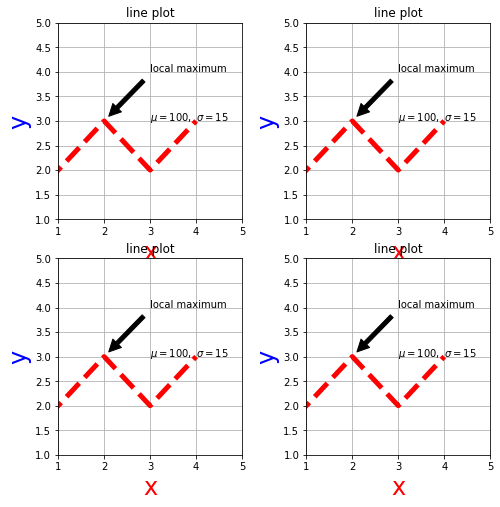

In [6]:
def test_plot(ax):
    ax.plot([1, 2, 3, 2, 3], 'r--', linewidth=5)
    ax.set_title('line plot') # set ax property explicitly
    ax.set_xlabel('x', fontsize=24, color='red')
    ax.set_ylabel('y', fontsize=24, color='blue')
    ax.set_xlim(1, 5)
    ax.set_ylim(1, 5)
    # ax.axis([1, 5, 1, 5]) # axis range
    ax.grid(True)
    ax.text(3, 3, r'$\mu=100,\ \sigma=15$')
    ax.annotate('local maximum', xy=(2, 3), xytext=(3, 4),
                 arrowprops=dict(facecolor='black', shrink=0.1),
                 )

# marker list?

f, ax_array = plt.subplots(2, 2, figsize=[10, 10])
for ax in ax_array.flatten():
    test_plot(ax)

f.subplots_adjust(top=0.8, bottom=0.2, left=0.20, right=0.8, hspace=0.2,
                wspace=0.35)

# Set lines
* use param
* use plt.setp

Text(3, 4, 'local maximum')

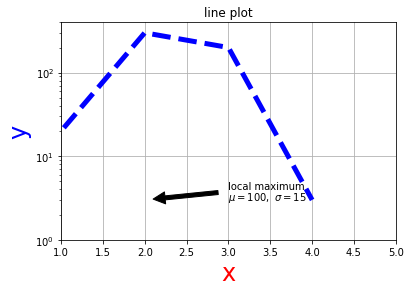

In [7]:
f, ax = plt.subplots()
line = ax.plot([1, 20, 300, 200, 3], 'r--', linewidth=5) # get objects
plt.setp(line, color='blue')
ax.set_title('line plot') # set ax property explicitly
ax.set_xlabel('x', fontsize=24, color='red')
ax.set_ylabel('y', fontsize=24, color='blue')
ax.set_xlim(1, 5)
ax.set_ylim(1, 400)
ax.set_yscale('log')

# ax.axis([1, 5, 1, 5]) # axis range
ax.grid(True)
ax.text(3, 3, r'$\mu=100,\ \sigma=15$')
ax.annotate('local maximum', xy=(2, 3), xytext=(3, 4),
             arrowprops=dict(facecolor='black', shrink=0.1),
             )



# line property
[line property](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)

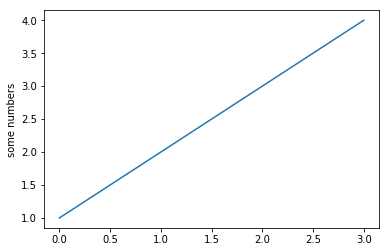

In [8]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

# Coding styles

Use the pyplot interface for creating figures, and then use the object methods for the rest:

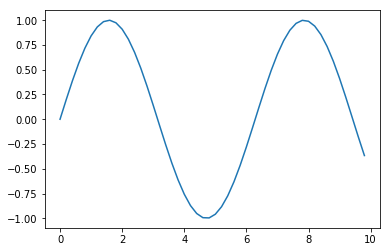

In [9]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

NameError: name 'data1' is not defined

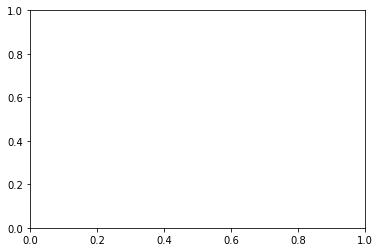

In [10]:
# function to reuse plotting should receive a ax object
# recommended function signature
def my_plotter(ax, data1, data2, param_dict):
    pass



# Create ax outside
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

In [ ]:
%matplotlib widget

In [ ]:
# Jupyter widget ecosystem



In [ ]:
import matplotlib.pyplot as plt

plt.plot([1.6, 2.7])
plt.title("interactive test")
plt.xlabel("index")
ax = plt.gca()
ax.plot([3.1, 2.2])



In [ ]:
# close to release memory
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [ ]:
figure = plt.figure()
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )

plt.ylim(-2, 2)
plt.show()

# Plot Samples

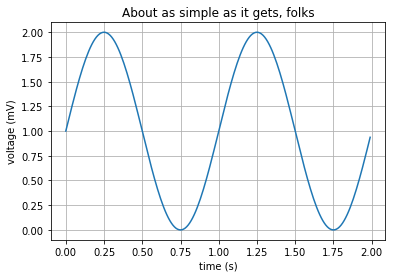

In [11]:
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

In [12]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

In [13]:
# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

In [14]:
sl = slice(1, 5 + dy, dy)

In [15]:
z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

In [16]:
z = z[:-1, :-1]

In [17]:
levels = MaxNLocator(nbins=100).tick_values(z.min(), z.max())

In [18]:
# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

In [19]:
b = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

In [20]:
fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')

# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)

cf = ax1.contourf(x[:-1, :-1].,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()

SyntaxError: invalid syntax (<ipython-input-20-c9cff9724823>, line 13)

## Histogram

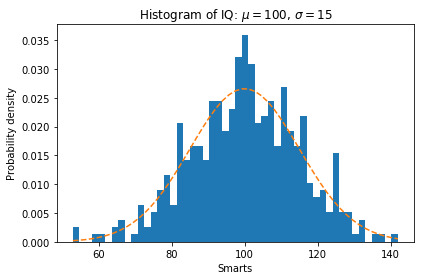

In [21]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

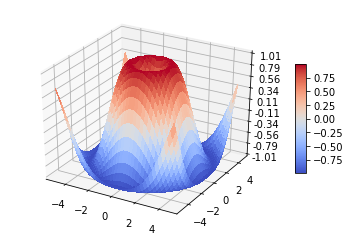

In [22]:
## 3D surface
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()

## Bar

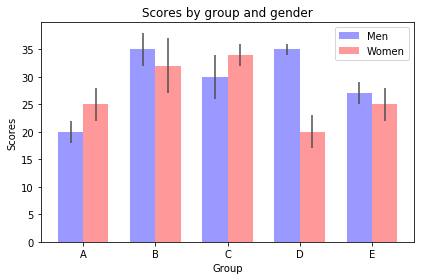

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                yerr=std_men, error_kw=error_config,
                label='Men')

rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                yerr=std_women, error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
## Stacked Bars
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

In [ ]:
## Horizontal Bar
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [ ]:
## Scatter Plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

In [ ]:
## import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years...
datemin = np.datetime64(r.date[0], 'Y')
datemax = np.datetime64(r.date[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()

In [ ]:
# Style
print(plt.style.available)


# Customizing the plot

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


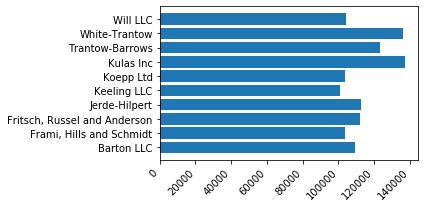

In [8]:
# sphinx_gallery_thumbnail_number = 10
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.rcParams.update({'figure.autolayout': True})

data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

fig, ax = plt.subplots(figsize=[6,3])
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
fig.show()

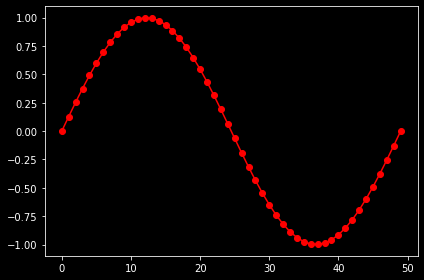

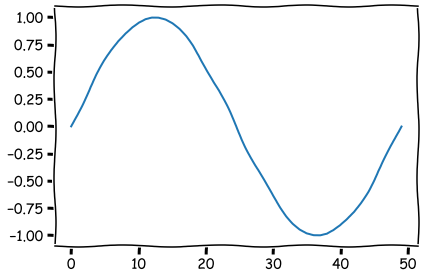

In [9]:
# Temporary styling
with plt.style.context(('dark_background')):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

with plt.xkcd():
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)))
plt.show()
    
    

In [ ]:
# Dynamic styling
import matplotlib as mpl

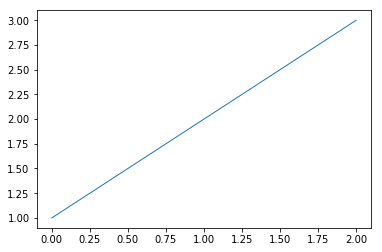

In [59]:
mpl.rcParams['lines.linewidth'] = 1
plt.plot([1, 2, 3])

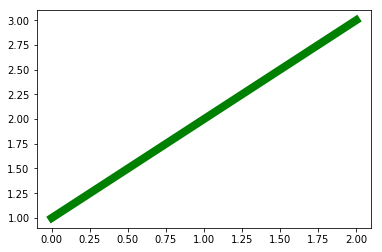

In [62]:
mpl.rc('lines', linewidth=8, color='g')
plt.plot([1,2,3], 'g')

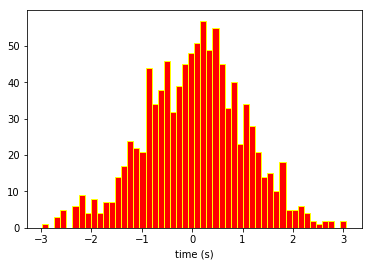

    agg_filter = None
    alpha = None
    animated = False
    antialiased = True
    bbox = Bbox(x0=-2.9798706855253547, y0=0.0, x1=-2.8590403...
    capstyle = butt
    children = []
    clip_box = TransformedBbox(     Bbox(x0=0.0, y0=0.0, x1=1.0, ...
    clip_on = True
    clip_path = None
    contains = None
    data_transform = CompositeGenericTransform(     TransformWrapper(  ...
    edgecolor = (1.0, 1.0, 0.0, 1.0)
    extents = Bbox(x0=69.21818181818182, y0=36.0, x1=75.30545454...
    facecolor = (1.0, 0.0, 0.0, 1.0)
    figure = Figure(432x288)
    fill = True
    gid = None
    hatch = None
    height = 1.0
    in_layout = True
    joinstyle = miter
    label = _nolegend_
    linestyle = solid
    linewidth = 1.0
    patch_transform = CompositeGenericTransform(     BboxTransformTo(   ...
    path = Path(array([[0., 0.],        [1., 0.],        [1.,...
    path_effects = []
    picker = None
    rasterized = None
    sketch_params = None
    snap = None
    transform = Compos

In [71]:
f, ax = plt.subplots()
n, bins, patches = ax.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow')
plt.setp(patches, facecolor='red')
ax.set_xlabel('time (s)')

plt.show()

mpl.artist.getp(patches[0])

## Artist Property
[Artist Property](https://matplotlib.org/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

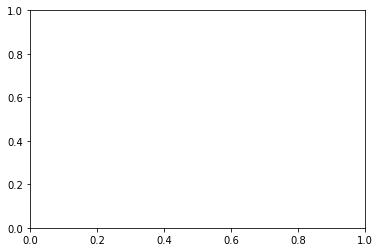

In [72]:
fig, ax = plt.subplots()
axis = ax.xaxis
axis.get_ticklocs()

In [73]:
axis.get_ticklabels()

<a list of 6 Text major ticklabel objects>

In [74]:
axis.get_ticklines()

<a list of 12 Line2D ticklines objects>

In [ ]:
# Artist Hiarachy


# Layout

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

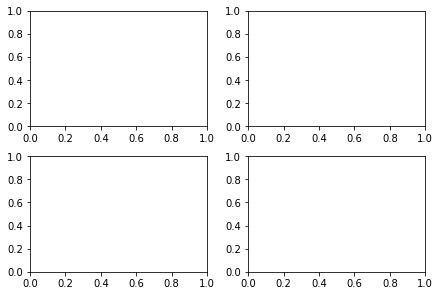

In [4]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)

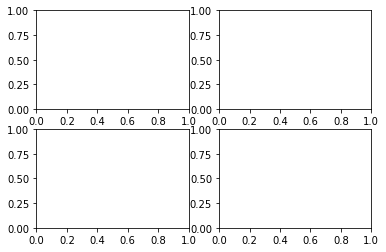

In [5]:
fig1, f1_axes = plt.subplots(ncols=2, nrows=2)

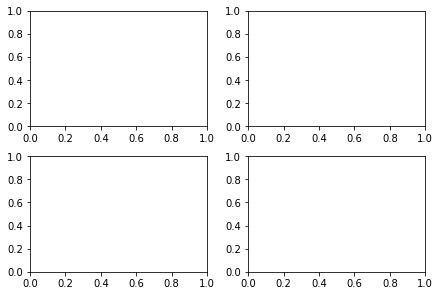

In [8]:
fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])

Text(0.5, 1.0, 'gs[-1, -2]')

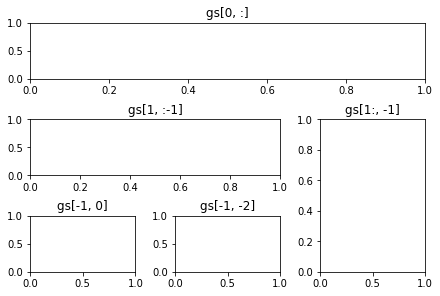

In [9]:
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')

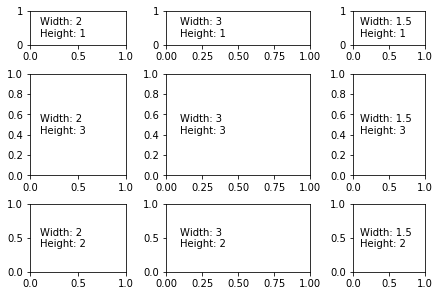

In [10]:
fig5 = plt.figure(constrained_layout=True)
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec5 = fig5.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig5.add_subplot(spec5[row, col])
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

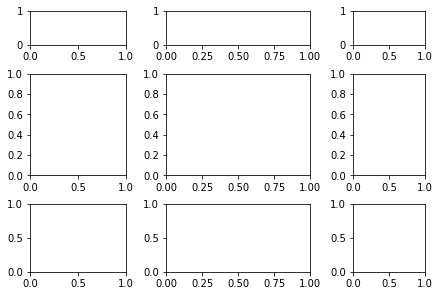

In [11]:
gs_kw = dict(width_ratios=widths, height_ratios=heights)
fig6, f6_axes = plt.subplots(ncols=3, nrows=3, constrained_layout=True,
        gridspec_kw=gs_kw)

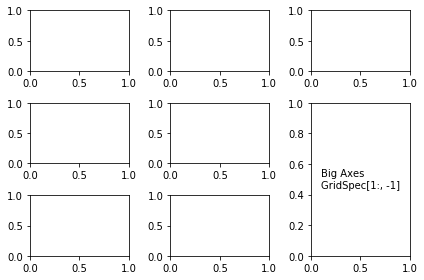

In [14]:
fig7, f7_axs = plt.subplots(ncols=3, nrows=3)
gs = f7_axs[1, 2].get_gridspec()
# remove the underlying axes
for ax in f7_axs[1:, -1]:
    ax.remove()
axbig = fig7.add_subplot(gs[1:, -1])
axbig.annotate('Big Axes \nGridSpec[1:, -1]', (0.1, 0.5),
               xycoords='axes fraction', va='center')

fig7.tight_layout()

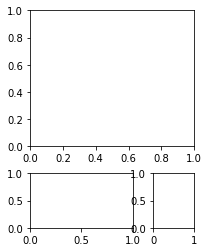

In [28]:
fig8 = plt.figure(constrained_layout=False)
gs1 = fig8.add_gridspec(nrows=3, ncols=3, left=0.1, right=0.48, wspace=0.5, hspace=0.5)
f8_ax1 = fig8.add_subplot(gs1[:-1, :])
f8_ax2 = fig8.add_subplot(gs1[-1, :-1])
f8_ax3 = fig8.add_subplot(gs1[-1, -1])

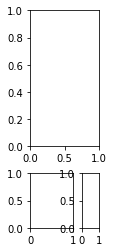

In [30]:
fig8 = plt.figure(constrained_layout=False)
gs1 = fig8.add_gridspec(nrows=3, ncols=3, left=0.32, right=0.48, wspace=0.5, hspace=0.5)
f8_ax1 = fig8.add_subplot(gs1[:-1, :])
f8_ax2 = fig8.add_subplot(gs1[-1, :-1])
f8_ax3 = fig8.add_subplot(gs1[-1, -1])

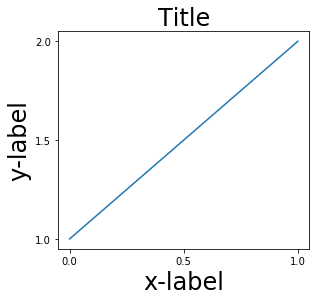

In [32]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

import matplotlib._layoutbox as layoutbox

plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 4.5, 4.


def example_plot(ax, fontsize=12, nodec=False):
    ax.plot([1, 2])

    ax.locator_params(nbins=3)
    if not nodec:
        ax.set_xlabel('x-label', fontsize=fontsize)
        ax.set_ylabel('y-label', fontsize=fontsize)
        ax.set_title('Title', fontsize=fontsize)
    else:
        ax.set_xticklabels('')
        ax.set_yticklabels('')


fig, ax = plt.subplots(constrained_layout=False)
example_plot(ax, fontsize=24)

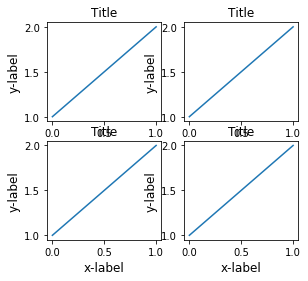

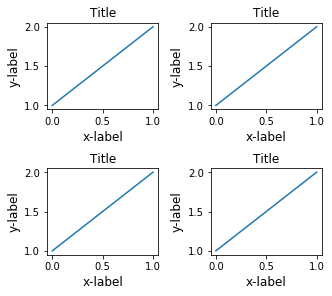

In [34]:
fig, axs = plt.subplots(2, 2, constrained_layout=False)
for ax in axs.flatten():
    example_plot(ax)
    
    
fig, axs = plt.subplots(2, 2, constrained_layout=True)
for ax in axs.flatten():
    example_plot(ax)    